Igor Sudin MADE ML-22

В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:

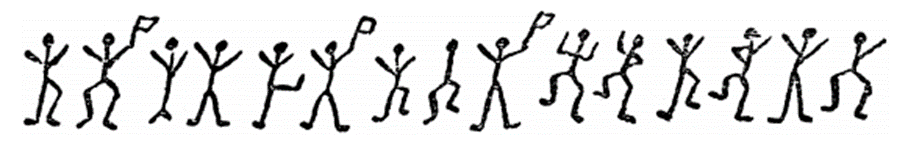

Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.
В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:
https://www.dropbox.com/s/k23enjvr3fb40o5/corpora.zip 


In [2]:
import numpy as np
import re
import random
import copy
import warnings
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product, combinations
from tqdm.notebook import tqdm

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

PATH_WAR = "corpora/WarAndPeace.txt"
PATH_ANNA = "corpora/AnnaKarenina.txt"

# PATH_WAR = "/content/drive/MyDrive/#Академия MADE/2 sem/Advanced ML/HW 3/corpora/WarAndPeace.txt"
# PATH_ANNA = "/content/drive/MyDrive/#Академия MADE/2 sem/Advanced ML/HW 3/corpora/AnnaKarenina.txt"

random.seed(47)

### Task 1


1. Реализуйте базовый частотный метод по Шерлоку Холмсу:
  * подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
  * возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
  * расшифруйте их таким частотным методом.

In [3]:
# Прочитаем тескты, приведем их в нижний регистр и очистим от знаков пунктуации

corpus_paths = [PATH_WAR, PATH_ANNA] 

def corpus_preparation(corpus_paths):
  """
  This function reads txt files at provided paths, 
  removes layout and punctuation and converts to lowercase 
  """
  texts_list = []
  # layout_symbols_filter = re.compile("(\\n)|(\\t)")
  # punctuation_symbols_filter = re.compile("\W+")
  # latin_symbols_filter = re.compile("[^а-я]")
  text_filter = re.compile("[^а-я]+")
  
  for path in corpus_paths:
    with open(path, "r", encoding="utf-8") as text_file:
      text = text_file.readlines()
    text = " ".join(text)
    texts_list.append(text)
  
  text = " ".join(texts_list)
  text = text_filter.sub(" ", text.lower())
  # text = layout_symbols_filter.sub(" ", text.lower())
  # text = latin_symbols_filter.sub(" ", text)
  # text = punctuation_symbols_filter.sub(" ", text)
  
  return text


def encoder(text_to_encode, list_alphabet):
  """
  Random permutation encoder
  """
  shuffled_alphabet = copy.deepcopy(list_alphabet)
  random.shuffle(shuffled_alphabet)
  for old, new in zip(list_alphabet, shuffled_alphabet):
    text_to_encode = text_to_encode.replace(old, new)
  return text_to_encode


def decoder(text_to_decode, letters_frequency):
  """
  Simple frequency decoder
  """
  text_latters_frequency = Counter(text_to_decode)
  letter_vocab = dict([(text_l[0], corpus_l[0]) for text_l, corpus_l in zip(
                      sorted(text_latters_frequency.items(), key=lambda item: -item[1]),
                      sorted(letters_frequency.items(), key=lambda item: -item[1]))])
  
  for key in letters_frequency.keys():
    if key not in letter_vocab.keys():
      letter_vocab[key] = key
  
  text_to_decode = text_to_decode.translate(str.maketrans(letter_vocab))
  return text_to_decode, letter_vocab

def score(true, predict):
  """
  Get accuracy
  """
  # if len(true) != len(predict):
  #   warnings.warn("\nThe length of the true text and the prediction not equal.\
  #                   In this case of use mostly becouse encoded string len % n gram len != 0")
  length = len(true)
  true_predicted = 0
  for t_l, p_l in zip(true, predict):
      if t_l == p_l:
        true_predicted += 1
  return true_predicted/length

def describe(original, encoded, decoded, compact = False, symbols_per_line=120):
  """
  Print original encoded and decoded texts and also the score
  """
  sc = None
  if original is not None and decoded is not None:
    sc = score(original, decoded)
  if compact == True:
    original = None
  if original is not None:
    print("Исходный текст:", 
          *[original[i:i+symbols_per_line] for i in range(0, len(original), symbols_per_line)], '\n', 
          end='', sep='\n')
  if encoded is not None: 
    print("\nЗакодированный текст:", 
          *[encoded[i:i+symbols_per_line] for i in range(0, len(encoded), symbols_per_line)], '\n',
          end='', sep='\n')
  if decoded is not None:
    print("\nДекодированный текст:", 
          *[decoded[i:i+symbols_per_line] for i in range(0, len(decoded), symbols_per_line)], '\n',
          end='', sep='\n')
  if sc:
    print("\nТочность:", sc, '\n', end='', sep='\n')
  
text = corpus_preparation(corpus_paths)
print(text[:100])

 война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател


In [4]:
ru_alphabet = " абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
list_ru_alphabet = list(ru_alphabet)
letters_frequency = Counter(text)
example = \
"""
Чувство величия преходяще. Оно непостоянно и непоследовательно. 
Отчасти оно зависит от мифотворческого воображения человечества. 
Человек, испытывающий величие, должен чувствовать миф, в который вплетена его жизнь. 
Он должен отражать то, что этот миф проецирует на него. 
И он должен быть прежде всего ироничным – ибо именно ирония удержит его от веры в собственное величие, 
она – единственное, что даст ему подвижность внутри себя. 
Без этого качества даже и случайное величие уничтожит человека.
Принцесса Ирулан. «Избранные изречения Муад'Диба»
"""
text_filter = re.compile("[^а-я]+")
example = text_filter.sub(" ", example.lower())

In [5]:
encoded_example = encoder(example, list_ru_alphabet)
decoded_example, _ = decoder(encoded_example, letters_frequency)
describe(example, encoded_example, decoded_example)

Исходный текст:
 чувство величия преходяще оно непостоянно и непоследовательно отчасти оно зависит от мифотворческого воображения челове
чества человек испытывающий величие должен чувствовать миф в который вплетена его жизнь он должен отражать то что этот м
иф проецирует на него и он должен быть прежде всего ироничным ибо именно ирония удержит его от веры в собственное величи
е она единственное что даст ему подвижность внутри себя без этого качества даже и случайное величие уничтожит человека п
ринцесса ирулан избранные изречения муад диба 


Закодированный текст:
аоал ллжалгозозфафвгкжщфигажнжангфж лжфннжазангфж огщжлмлгопнжажлом лзажнжаемлз злажлайзсжллжвог пжбжалжжквмргнзфаогожлг
ог ллмаогожлгпаз фмлмлмгиздалгозозгащжоргнаоал ллжлмлпайзсалапжлжвмдалфоглгнмагбжарзенпажнащжоргнажлвмрмлпалжаолжащлжлай
зсафвжгкзвагланмангбжазажнащжоргнакмлпафвгрщгал гбжазвжнзонмйазкжазйгннжазвжнзфаащгврзлагбжажлалгвмала жк ллгннжгалгозоз
гажнмагщзн ллгннжгаолжащм лагйаафжщлзрнж лпалналвза гкфакгеащлжбжа

### Task 2

2. Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
  * подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
  * проведите тестирование аналогично п.1, но при помощи биграмм.

In [6]:
def custom_make_translation(text, vocab):
    """
    Sourse https://stackoverflow.com/questions/63230213/translate-table-value-error-valueerror-string-keys-in-translate-table-must-be-o
    Standard translate method don't provide translations of n grams
    """
    regex = re.compile('|'.join(map(re.escape, vocab)))
    return regex.sub(lambda match: vocab[match.group(0)], text)


def n_gram_counter(text: str, n_gram_len: int = 2):
  list_of_n_grams = [text[i:i + n_gram_len] for i in range(0, len(text) - n_gram_len + 1, 1)]
  return Counter(list_of_n_grams)


def n_gram_deocder(text_to_decode, language_corpus, n_gram_len=2):
  n_gram_corpus_freq = n_gram_counter(language_corpus, n_gram_len)
  n_gram_text_freq = n_gram_counter(text_to_decode, n_gram_len)
  n_gram_vocab = dict([(text[0], corpus[0]) for text, corpus in zip(
                      sorted(n_gram_text_freq.items(), key=lambda item: -item[1]),
                      sorted(n_gram_corpus_freq.items(), key=lambda item: -item[1]))])
  
  text_to_decode = custom_make_translation(text_to_decode, n_gram_vocab)
  return text_to_decode, n_gram_vocab

Исходный текст:
 чувство величия преходяще оно непостоянно и непоследовательно отчасти оно зависит от мифотворческого воображения челове
чества человек испытывающий величие должен чувствовать миф в который вплетена его жизнь он должен отражать то что этот м
иф проецирует на него и он должен быть прежде всего ироничным ибо именно ирония удержит его от веры в собственное величи
е она единственное что даст ему подвижность внутри себя без этого качества даже и случайное величие уничтожит человека п
ринцесса ирулан избранные изречения муад диба 


Закодированный текст:
аоал ллжалгозозфафвгкжщфигажнжангфж лжфннжазангфж огщжлмлгопнжажлом лзажнжаемлз злажлайзсжллжвог пжбжалжжквмргнзфаогожлг
ог ллмаогожлгпаз фмлмлмгиздалгозозгащжоргнаоал ллжлмлпайзсалапжлжвмдалфоглгнмагбжарзенпажнащжоргнажлвмрмлпалжаолжащлжлай
зсафвжгкзвагланмангбжазажнащжоргнакмлпафвгрщгал гбжазвжнзонмйазкжазйгннжазвжнзфаащгврзлагбжажлалгвмала жк ллгннжгалгозоз
гажнмагщзн ллгннжгаолжащм лагйаафжщлзрнж лпалналвза гкфакгеащлжбжа

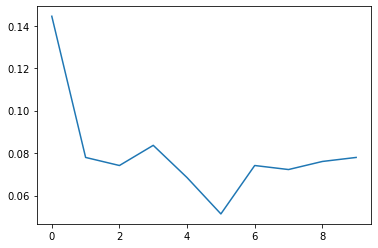

In [7]:
score_list = []
for n_gram_len in range(1, 11):
  decoded_example, _ = n_gram_deocder(encoded_example, text, n_gram_len)
  score_list.append(score(example, decoded_example))
  if n_gram_len in [1, 2, 3]:
    describe(example, encoded_example, decoded_example)

plt.plot(score_list);

### Task 3

3. Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
  * предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
  * реализуйте и протестируйте его, убедитесь, что результаты улучшились.

In [8]:
def n_gram_transition_counter(text: str, n_gram_len: int = 2):
  """
  Count number of transitions for n grams in provided text.
  Return Counter with pairs
  """
  n_gram_len -= 1
  list_of_n_gram_transitions = [(text[i:i + n_gram_len], text[i + n_gram_len:i + n_gram_len +1]) for i in range(0, len(text) - n_gram_len + 1, 1)]
  return Counter(list_of_n_gram_transitions)


def n_gram_transition_matrix_counter(corpus, list_alphabet, n_gram_len = 2, return_dict = True):
    """
    Function builds Counter with all possible transitions for provided language and corpus.
    Return dict by default to provide matrix interface and total number of transitions
    """
    t_counter = Counter(
                        [i for i in product(
                            *[[''.join(n_gram) for n_gram in product(list_alphabet, repeat=n_gram_len-1)],
                            list_ru_alphabet]
                            )
                        ]
                      )
    t_text_counter = n_gram_transition_counter(text, n_gram_len)
    t_counter = t_counter + t_text_counter

    total = sum(t_counter.values())

    if return_dict:
      return {pair[0] : {letter : t_counter[(pair[0], letter)] for letter in list_alphabet} for pair in t_counter.keys()}, total
    else:
      return t_counter, total


def get_transition_prob_matrix(transition_matrix, total):
  """
  Count probability for each transition
  """
  for start_key, ends_dict in transition_matrix.items():
    for end_key, num in ends_dict.items():
      transition_matrix[start_key][end_key] = num/total
  return transition_matrix

def get_log_likelihood(T, text, n_gram_len = 2):
  ll = 0
  n_gram_len -= 1
  for i in range(0, len(text) - n_gram_len, 1):
    ll += np.log(T[text[i:i + n_gram_len]][text[i + n_gram_len:i + n_gram_len +1]])
  return ll

def get_random_vocab(list_alphabet):
  shuffled_alphabet = copy.deepcopy(list_alphabet)
  random.shuffle(shuffled_alphabet)
  return {k: v for k, v in zip(list_alphabet, shuffled_alphabet)}

def decode_mcmc(text_to_decode, corpus, list_alphabet, n_gram_len = 2, steps = 100, attempts=10):
  """
  Decoder based on MCMC sampling
  n_gram_len: Must be >= 2
  """
  ### getting transition matrix
  T, total = n_gram_transition_matrix_counter(corpus, list_alphabet, n_gram_len)
  T = get_transition_prob_matrix(T, total)

  # ### initial vocab
  # letters_frequency = Counter(corpus)
  # _ , vocab = decoder(text_to_decode, letters_frequency)
  vocab = get_random_vocab(list_alphabet)
  prev_ll = get_log_likelihood(T, text_to_decode.translate(str.maketrans(vocab)), n_gram_len)
  iter = 0

  best_vocab = vocab.copy()
  best_ll = prev_ll

  for _ in tqdm(range(attempts), colour='blue'):
    while iter < 100:
      old_iter = iter
      for _ in tqdm(range(steps), leave=False):
        i = random.choice(list(vocab.keys()))
        j = random.choice(list(vocab.keys()))    
        new_vocab = vocab.copy()
        new_vocab[i], new_vocab[j] = new_vocab[j], new_vocab[i]
        new_ll = get_log_likelihood(T, text_to_decode.translate(str.maketrans(new_vocab)), n_gram_len)
        if new_ll > prev_ll:
          vocab = new_vocab.copy()
          prev_ll = new_ll
          iter += 1

      if old_iter == iter:
        break
    
    if prev_ll > best_ll:
      best_vocab = vocab.copy()
      best_ll = prev_ll

    vocab = get_random_vocab(list_alphabet)
    prev_ll = get_log_likelihood(T, text_to_decode.translate(str.maketrans(vocab)), n_gram_len)
    iter = 0

  text_to_decode = text_to_decode.translate(str.maketrans(best_vocab))
  return text_to_decode, vocab

In [9]:
decoded_mcmc, vocab_mcmc = decode_mcmc(encoded_example, text, list_ru_alphabet, 2, 2000, 15)
describe(example, encoded_example, decoded_mcmc)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Исходный текст:
 чувство величия преходяще оно непостоянно и непоследовательно отчасти оно зависит от мифотворческого воображения челове
чества человек испытывающий величие должен чувствовать миф в который вплетена его жизнь он должен отражать то что этот м
иф проецирует на него и он должен быть прежде всего ироничным ибо именно ирония удержит его от веры в собственное величи
е она единственное что даст ему подвижность внутри себя без этого качества даже и случайное величие уничтожит человека п
ринцесса ирулан избранные изречения муад диба 


Закодированный текст:
аоал ллжалгозозфафвгкжщфигажнжангфж лжфннжазангфж огщжлмлгопнжажлом лзажнжаемлз злажлайзсжллжвог пжбжалжжквмргнзфаогожлг
ог ллмаогожлгпаз фмлмлмгиздалгозозгащжоргнаоал ллжлмлпайзсалапжлжвмдалфоглгнмагбжарзенпажнащжоргнажлвмрмлпалжаолжащлжлай
зсафвжгкзвагланмангбжазажнащжоргнакмлпафвгрщгал гбжазвжнзонмйазкжазйгннжазвжнзфаащгврзлагбжажлалгвмала жк ллгннжгалгозоз
гажнмагщзн ллгннжгаолжащм лагйаафжщлзрнж лпалналвза гкфакгеащлжбжа

In [10]:
list_score = []
for i in [2,3,4]:
  decoded_mcmc, vocab_mcmc = decode_mcmc(encoded_example, text, list_ru_alphabet, i, 2000, 15)
  if i == 2:
    describe(example, encoded_example, decoded_mcmc)
  else:
    describe(None, None, decoded_mcmc)

  list_score.append(score(example, decoded_mcmc))

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Исходный текст:
 чувство величия преходяще оно непостоянно и непоследовательно отчасти оно зависит от мифотворческого воображения челове
чества человек испытывающий величие должен чувствовать миф в который вплетена его жизнь он должен отражать то что этот м
иф проецирует на него и он должен быть прежде всего ироничным ибо именно ирония удержит его от веры в собственное величи
е она единственное что даст ему подвижность внутри себя без этого качества даже и случайное величие уничтожит человека п
ринцесса ирулан избранные изречения муад диба 


Закодированный текст:
аоал ллжалгозозфафвгкжщфигажнжангфж лжфннжазангфж огщжлмлгопнжажлом лзажнжаемлз злажлайзсжллжвог пжбжалжжквмргнзфаогожлг
ог ллмаогожлгпаз фмлмлмгиздалгозозгащжоргнаоал ллжлмлпайзсалапжлжвмдалфоглгнмагбжарзенпажнащжоргнажлвмрмлпалжаолжащлжлай
зсафвжгкзвагланмангбжазажнащжоргнакмлпафвгрщгал гбжазвжнзонмйазкжазйгннжазвжнзфаащгврзлагбжажлалгвмала жк ллгннжгалгозоз
гажнмагщзн ллгннжгаолжащм лагйаафжщлзрнж лпалналвза гкфакгеащлжбжа

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
 л тстто телилик кредовкше оно некостокнно и некослевотательно отласти оно затисит от михотторлесього тоодраженик лелоте
лестта лелотеь искататаешия телилие волжен л тсттотать мих т ьоторая тклетена его жизнь он волжен отражать то лто втот м
их кроедир ет на него и он волжен дать крежве тсего иронилнам идо именно ироник  вержит его от тера т содсттенное телили
е она евинсттенное лто васт ем  ковтижность тн три седк дез втого ьалестта важе и сл лаяное телилие  нилтожит лелотеьа к
риндесса ир лан издраннае изреленик м ав вида 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
 л тстто телилип пребодпше оно непостопнно и непоследотательно отласти оно затисит от михотторлесього тоображенип лелоте
лестта лелотеь испататаешив телилие должен л тсттотать мих т ьоторав тплетена его жизнь он должен отражать то лто дтот м
их проебир ет на него и он должен бать прежде тсего иронилнам ибо именно иронип  держит его от тера т собсттенное телили
е она единсттенное лто даст ем  подтижность тн три себп без дтого ьалестта даже и сл лавное телилие  нилтожит лелотеьа п
ринбесса ир лан избраннае изреленип м ад диба 



Для дальнейшего увеличения длинны n граммы нехватает памяти для получения матрицы переходов.

In [12]:
decoded_mcmc, vocab_mcmc = decode_mcmc(encoded_example, text, list_ru_alphabet, 5, 2000, 15)
describe(None, None, decoded_mcmc)
list_score.append(score(example, decoded_mcmc))

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
 л тстто телилип пребодпше оно непостопнно и непоследотательно отласти оно затисит от мияотторлесього тоображенип лелоте
лестта лелотеь испататаешив телилие должен л тсттотать мия т ьоторав тплетена его жизнь он должен отражать то лто дтот м
ия проебир ет на него и он должен бать прежде тсего иронилнам ибо именно иронип  держит его от тера т собсттенное телили
е она единсттенное лто даст ем  подтижность тн три себп без дтого ьалестта даже и сл лавное телилие  нилтожит лелотеьа п
ринбесса ир лан избраннае изреленип м ад диба 



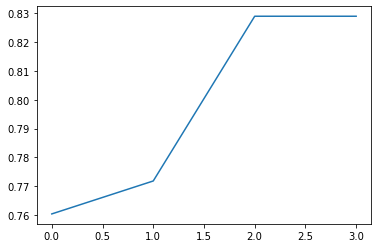

In [13]:
plt.plot(list_score);

При 6-граммах падает даже локально

### Task 3.1 random walk modification

In [16]:
def log_accept(l_old, l_new, rw_mode='off'):
  if rw_mode == 'off':
    return l_new > l_old
  elif rw_mode == 'default':
    return ((l_new < l_old) or (np.random.rand() < (np.exp(l_new - l_old))))
  elif rw_mode == 'control':
    return (np.random.rand() < (np.exp(l_new-l_old)))

In [23]:
# немного модифицирую функцию добавив random walk 

def decode_mcmc_r(text_to_decode, corpus, list_alphabet, 
                  n_gram_len:int = 2, steps:int = 100, attempts:int =10, 
                  random_walk_mode:str = "off", rw_steps:int = None):
  """
  Decoder based on MCMC sampling
  n_gram_len: Must be >= 2
  random_walk_mode must be off, default, control
  """
  if random_walk_mode not in ['off', 'default', 'control']:
    raise ValueError("random_walk_mode variable must be off, default or control")
  ### getting transition matrix
  T, total = n_gram_transition_matrix_counter(corpus, list_alphabet, n_gram_len)
  T = get_transition_prob_matrix(T, total)

  # ### initial vocab
  # letters_frequency = Counter(corpus)
  # _ , vocab = decoder(text_to_decode, letters_frequency)
  vocab = get_random_vocab(list_alphabet)
  prev_ll = get_log_likelihood(T, text_to_decode.translate(str.maketrans(vocab)), n_gram_len)
  iter = 0

  best_vocab = vocab.copy()
  best_ll = prev_ll

  for _ in tqdm(range(attempts), colour='blue'):
    
    if rw_steps is not None:
      rw_steps_a = rw_steps
      if random_walk_mode != 'control':
        random_walk_mode = 'control'
    else:
      if random_walk_mode == 'control':
        raise ValueError("rw_steps must be int")
    
    if random_walk_mode == 'control': 
      mode = 'off'
    else:
      mode = random_walk_mode

    while iter < 100:
      old_iter = iter

      for _ in tqdm(range(steps), leave=False):
        i = random.choice(list(vocab.keys()))
        j = random.choice(list(vocab.keys()))    
        new_vocab = vocab.copy()
        new_vocab[i], new_vocab[j] = new_vocab[j], new_vocab[i]
        new_ll = get_log_likelihood(T, text_to_decode.translate(str.maketrans(new_vocab)), n_gram_len)
        
        if log_accept(prev_ll, new_ll, mode):
          vocab = new_vocab.copy()
          prev_ll = new_ll
          iter += 1

      if mode == 'control':
        mode = 'off'

      if old_iter == iter:
        if random_walk_mode == "control" and rw_steps_a != 0:
          rw_steps_a -= 1
          iter = 0
          mode = 'control'
          continue
        break
    
    if prev_ll > best_ll:
      best_vocab = vocab.copy()
      best_ll = prev_ll

    # init new vocab for next attempt
    vocab = get_random_vocab(list_alphabet)
    prev_ll = get_log_likelihood(T, text_to_decode.translate(str.maketrans(vocab)), n_gram_len)
    iter = 0

  text_to_decode = text_to_decode.translate(str.maketrans(best_vocab))
  return text_to_decode, vocab

In [21]:
# default mode
list_score = []
for i in [2,3,4]:
  decoded_mcmc, vocab_mcmc = decode_mcmc_r(encoded_example, text, list_ru_alphabet, i, 2000, 15, random_walk_mode='default')
  if i == 2:
    describe(example, encoded_example, decoded_mcmc)
  else:
    describe(None, None, decoded_mcmc)

  list_score.append(score(example, decoded_mcmc))

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

C:\Users\sudin\AppData\Local\Temp\ipykernel_1736\2939233211.py:5: RuntimeWarning: overflow encountered in exp
  return ((l_new < l_old) or (np.random.rand() < (np.exp(l_new - l_old))))


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Исходный текст:
 чувство величия преходяще оно непостоянно и непоследовательно отчасти оно зависит от мифотворческого воображения челове
чества человек испытывающий величие должен чувствовать миф в который вплетена его жизнь он должен отражать то что этот м
иф проецирует на него и он должен быть прежде всего ироничным ибо именно ирония удержит его от веры в собственное величи
е она единственное что даст ему подвижность внутри себя без этого качества даже и случайное величие уничтожит человека п
ринцесса ирулан избранные изречения муад диба 


Закодированный текст:
аоал ллжалгозозфафвгкжщфигажнжангфж лжфннжазангфж огщжлмлгопнжажлом лзажнжаемлз злажлайзсжллжвог пжбжалжжквмргнзфаогожлг
ог ллмаогожлгпаз фмлмлмгиздалгозозгащжоргнаоал ллжлмлпайзсалапжлжвмдалфоглгнмагбжарзенпажнащжоргнажлвмрмлпалжаолжащлжлай
зсафвжгкзвагланмангбжазажнащжоргнакмлпафвгрщгал гбжазвжнзонмйазкжазйгннжазвжнзфаащгврзлагбжажлалгвмала жк ллгннжгалгозоз
гажнмагщзн ллгннжгаолжащм лагйаафжщлзрнж лпалналвза гкфакгеащлжбжа

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
унуызыыбуыинвнвсусфирбёсхиуб бу исбзыбс  буву исбзниёбыпыинш бубынпзывуб буопывзвыубыущвйбыыбфнизшбчбуыббрфпци всунинбыи
низыыпунинбыишувзспыпыпихвмуыинвнвиуёбнци унуызыыбыпышущвйуыушбыбфпмуысниыи пуичбуцво шуб уёбнци убыфпцпышуыбуныбуёыбыущ
вйусфбирвфуиыу пу ичбувуб уёбнци урпышусфицёиуызичбувфб вн пщуврбувщи  бувфб всууёифцвыуичбубыуыифпуыузбрзыыи  биуыинвнв
иуб пуиёв зыыи  биуныбуёпзыуищуусбёывц бзышуы уыфвузирсуриоуёыбчбушпнизыыпуёпциувузнунпм биуыинвнвиуу вныбцвыунинбыишпус
фв риззпувфунп уворфп  пиувофини всущупёуёврпу



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
чбч щ  ич ебнбнтчтпеаизтшечигичгетищ итггичнчгетищбези я ебвгичи бящ нчигичмя нщн чи чцнъи  ипбещвифич ииапяуегнтчбеби е
бещ  ячбеби евчнщтя я яешнюч ебнбнечзибуегчбч щ  и я вчцнъч чви ипяюч тбе егячефичунмгвчигчзибуегчи пяуя вч ичб ичз и чц
нъчтпиеанпче чгячгефичнчигчзибуегчая вчтпеузеч щефичнпигнбгяцчнаичнцеггичнпигнтччзепун чефичи ч епяч чщиащ  еггиеч ебнбн
ечигячезнгщ  еггиечб ичзящ чецччтиз нугищ вч гч пнчщеатчаемчз ифичвябещ  ячзяуечнчщбчбяюгиеч ебнбнеччгнб иун чбеби евячт
пнгаещщячнпчбягчнмапяггяечнмпебегнтчцчязчзнаяч



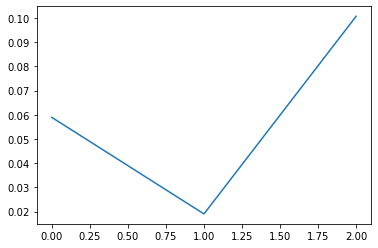

In [22]:
plt.plot(list_score);

In [24]:
# control mode
list_score = []
for i in [2,3,4]:
  decoded_mcmc, vocab_mcmc = decode_mcmc_r(encoded_example, text, list_ru_alphabet, i, 2000, 15, random_walk_mode='control', rw_steps=5)
  if i == 2:
    describe(example, encoded_example, decoded_mcmc)
  else:
    describe(None, None, decoded_mcmc)

  list_score.append(score(example, decoded_mcmc))

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Исходный текст:
 чувство величия преходяще оно непостоянно и непоследовательно отчасти оно зависит от мифотворческого воображения челове
чества человек испытывающий величие должен чувствовать миф в который вплетена его жизнь он должен отражать то что этот м
иф проецирует на него и он должен быть прежде всего ироничным ибо именно ирония удержит его от веры в собственное величи
е она единственное что даст ему подвижность внутри себя без этого качества даже и случайное величие уничтожит человека п
ринцесса ирулан избранные изречения муад диба 


Закодированный текст:
аоал ллжалгозозфафвгкжщфигажнжангфж лжфннжазангфж огщжлмлгопнжажлом лзажнжаемлз злажлайзсжллжвог пжбжалжжквмргнзфаогожлг
ог ллмаогожлгпаз фмлмлмгиздалгозозгащжоргнаоал ллжлмлпайзсалапжлжвмдалфоглгнмагбжарзенпажнащжоргнажлвмрмлпалжаолжащлжлай
зсафвжгкзвагланмангбжазажнащжоргнакмлпафвгрщгал гбжазвжнзонмйазкжазйгннжазвжнзфаащгврзлагбжажлалгвмала жк ллгннжгалгозоз
гажнмагщзн ллгннжгаолжащм лагйаафжщлзрнж лпалналвза гкфакгеащлжбжа

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
 л тстто телилик кредовкше оно некостокнно и некослевотательно отласти оно затисит от михотторлесього тоодраженик лелоте
лестта лелотеь искататаешия телилие волжен л тсттотать мих т ьоторая тклетена его жизнь он волжен отражать то лто втот м
их кроедир ет на него и он волжен дать крежве тсего иронилнам идо именно ироник  вержит его от тера т содсттенное телили
е она евинсттенное лто васт ем  ковтижность тн три седк дез втого ьалестта важе и сл лаяное телилие  нилтожит лелотеьа к
риндесса ир лан издраннае изреленик м ав вида 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
 л тстто телилип пребодпше оно непостопнно и непоследотательно отласти оно затисит от михотторлесього тоображенип лелоте
лестта лелотеь испататаешив телилие должен л тсттотать мих т ьоторав тплетена его жизнь он должен отражать то лто дтот м
их проебир ет на него и он должен бать прежде тсего иронилнам ибо именно иронип  держит его от тера т собсттенное телили
е она единсттенное лто даст ем  подтижность тн три себп без дтого ьалестта даже и сл лавное телилие  нилтожит лелотеьа п
ринбесса ир лан избраннае изреленип м ад диба 



In [26]:
list_score

[0.5171102661596958, 0.7718631178707225, 0.8288973384030418]

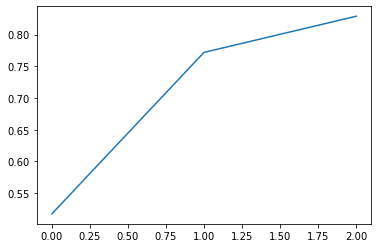

In [25]:
plt.plot(list_score);

Добавление случайности ухудшает результат

### Task 4

4. Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

  Или это (они одинаковые, второй вариант просто на случай проблем с юникодом):

  დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ

In [27]:
encoded_m = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"
support_vocab = {k: v for k, v in zip(set(encoded_m), list_ru_alphabet)}
encoded_m_ru = encoded_m.translate(str.maketrans(support_vocab))

In [28]:
encoded_m_ru

'зчпабксбкавадзбёхлшщпеёстбапабйхцдабёхлшщпеёстбдзфчдбжбндх хбчххгрзёамбфхдхлстбпз фхбйлхцадщдебчфхлззбкчз хбксбкчзбчвзпщпабйлщкапеёхбабйхпжцадзбшщфчашщпеёстбгщппбищбйхчпзвёззбцздкзлдхзбищвщёазбфжлчщбухдмбфхёзцёхбмбёацз хбёзбхгзрщо'

In [ ]:
for i in [2,3,4]:
  decoded_m, vocab_m = decode_mcmc(encoded_m_ru, text, list_ru_alphabet, i, 2000, 15)
  describe(None, None, decoded_m)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смела
ли правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаж



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сдела
ли правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


Декодированный текст:
если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сдела
ли правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю



### Task 5

Бонус: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

**Сделал данное задание в рамках 3 и 4 заданий**
Не понимаю почему настолько плохо расшифровывается мое закодированное сообщение. Возможно из-за того что такие сочитания слов и слова мало встречаются в "обучающих" данных. 

### Task 6

6. Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

При очень хорошем качестве, данный подход неплохо использовать для автоматического исправления опечаток. Например разделив текст на слова и исправляя каждое слово поотдельности. Хотя это плохой кейс так как можно испортить слово еще больше заменив с неправильной правильные буквы.

